This Jupyter Notebook is meant to create the data visualization for our 3D Conceptual Risk-Scoring  Matrix Model, using Matplotlib with Python. 

Source/Credits: https://likegeeks.com/3d-plotting-in-python/

## Importing Libraries

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating Scores for the 3 Columns Tagged to Class Name

In [3]:
import pandas as pd

In [4]:
# df = pd.read_csv("Consolidated_News_Articles_With_Sentiment_Labels.csv")

df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")


df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [4]:
df['new_class_name'].unique()

array(['geophysical event', 'idiosyncratic', 'cyberattack',
       'Acute climatological event (cyclone)', 'pandemic',
       'Acute climatological event (droughts)', 'Economic Crisis',
       'Acute climatological event (flood)',
       'Acute climatological event (heat stress)', 'Man-Made Disaster',
       'Terrorism', 'Trade Dispute', 'Military Conflicts'], dtype=object)

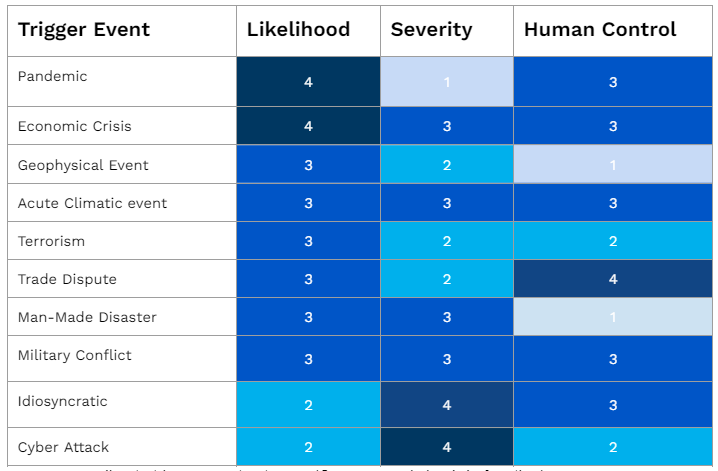

In [67]:
def create_likelihood_score(x):
    if x == 'idiosyncratic':
        return 2
    elif x == 'geophysical event':
        return 3
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 3
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 4
    elif x == 'pandemic':
        return 4
    elif x == 'Trade Dispute':
        return 3
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3
        

In [68]:
def create_severity_score(x):
    if x == 'idiosyncratic':
        return 4
    elif x == 'geophysical event':
        return 2
    elif x == 'cyberattack':
        return 4
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 1
    elif x == 'Trade Dispute':
        return 2
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3

In [8]:
def create_human_control_score(x):
    if x == 'idiosyncratic':
        return 3
    elif x == 'geophysical event':
        return 1
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 3
    elif x == 'Trade Dispute':
        return 4
    elif x == 'Man-Made Disaster':
        return 1
    else:
        return 3

In [9]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative


In [10]:
df['Likelihood Score'] = df['new_class_name'].apply(create_likelihood_score)

In [11]:
df["Likelihood Score"].value_counts()

3    9292
2    2437
4    2018
Name: Likelihood Score, dtype: int64

In [12]:
df['Severity Score'] = df['new_class_name'].apply(create_severity_score)

In [13]:
df['Human Control Score'] = df['new_class_name'].apply(create_human_control_score)

In [14]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1


# Editing the Severity Scores

In [5]:
df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")

df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [47]:
for i in range(len(df)):
    severity_score = df["Severity Score"].loc[i]
    sentiment_label = df["sentiment label"].loc[i]
    compound_score = df["compound score"].loc[i]
    
#     print(compound_score)
    
    if sentiment_label == "negative":
#         print(compound_score)
        compound_score = -compound_score
        mid = compound_score + severity_score
#         print(f"{sentiment_label}: {test}")
        if test > 4:
            test = 4
        df["New Severity Score"].loc[i] = mid
    elif sentiment_label == "positive":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {test}")
        df["New Severity Score"].loc[i] = severity_score - compound_score 
    elif sentiment_label == "neutral":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {severity_score}")
        df["New Severity Score"].loc[i] = severity_score

        
    

In [48]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [52]:
df.to_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")

In [56]:
df['New Severity Score'].value_counts()

3.0000    1754
4.0000     615
2.0000     582
1.0000     337
3.7003      50
          ... 
2.6044       1
2.1317       1
4.7335       1
1.6240       1
3.7394       1
Name: New Severity Score, Length: 2373, dtype: int64

In [61]:
df['sentiment label'].value_counts()

negative    6817
positive    3642
neutral     3288
Name: sentiment label, dtype: int64

In [64]:
df['Severity Score'][df['sentiment label'] == 'neutral'].value_counts()

3    1754
4     615
2     582
1     337
Name: Severity Score, dtype: int64

# Cleaning the Data Again

Cleaning methods used:
- lower case for all text
- tokenize words

In [15]:
import os
base_directory = "C:/Users/Darren/Documents/GitHub/FSX"

directory = os.chdir(f"{base_directory}/News Classifier/CSV Data for Classifier")
files = os.listdir(".")
files

['avalanche_straitstimes.csv',
 'contamination_straitstimes.csv',
 'cyberattack_straitstimes.csv',
 'cyclone_straitstimes.csv',
 'dengue_straitstimes.csv',
 'drought_straitstimes.csv',
 'earthquake_straitstimes.csv',
 'ebola_straitstimes.csv',
 'economic crisis_straitstimes.csv',
 'floods_straitstimes.csv',
 'heat stress_straitstimes.csv',
 'Influenza_straitstimes.csv',
 'limnic eruption_straitstimes.csv',
 'nuclear_straitstimes.csv',
 'oil spills_straitstimes.csv',
 'pandemic_straitstimes.csv',
 'SarS_straitstimes.csv',
 'sinkhole_straitstimes.csv',
 'terror_straitstimes.csv',
 'tradedispute_straitstimes.csv',
 'tsunami_straitstimes.csv',
 'Unsafe_straitstimes.csv',
 'volcanic eruption_straitstimes.csv',
 'war_straitstimes.csv']

In [17]:
directory = "C:/Users/Darren/Documents/GitHub/FSX/News Classifier/CSV Data for Classifier"
print(directory)

C:/Users/Darren/Documents/GitHub/FSX/News Classifier/CSV Data for Classifier


In [18]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
         df = df.append(pd.read_csv(directory+"/"+file), ignore_index=True) 
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event


In [19]:
df.shape

(13747, 9)

In [20]:
df['new_class_name'].value_counts()

Acute climatological event (droughts)       1743
idiosyncratic                               1320
Acute climatological event (flood)          1256
geophysical event                           1174
cyberattack                                 1117
Terrorism                                   1050
Military Conflicts                          1022
Economic Crisis                             1018
pandemic                                    1000
Acute climatological event (cyclone)         887
Trade Dispute                                809
Man-Made Disaster                            801
Acute climatological event (heat stress)     550
Name: new_class_name, dtype: int64

In [24]:
df['content summary'].tail()

13742    BANGKOK - In the first few weeks after the Feb...
13743    BANGKOK (NYTIMES) - In the murky waters of the...
13744    KUALA LUMPUR • Malaysia plans to boost its Cov...
13745    MAE SAM LAEP, THAILAND (REUTERS) - Seven peopl...
13746    LOS ANGELES (REUTERS) - Oscar-winning "Jojo Ra...
Name: content summary, dtype: object

In [31]:
import re
import string

def clean_regex(x):

    x = re.sub(r'\w*\d\w*','', str(x))    # remove number
    x = re.sub(r'[\S]+#[\S]+','',str(x))  # remove hashtags
    x = re.sub(r'#[\S]+','', str(x))      # remove hashtags 
    x = re.sub(r'[^\w\s]', '', str(x))
    
            
#     x = x.replace(',','')                 # remove commas
#     x = x.replace('/','')                 # remove slash
    x = x.replace('-','')                 # remove -
    
    return x



test = clean_regex("MUMBAI (REUTERS) 999 - A #Himalayan avalanche killed you're .")

test

# test.strip(string.punctuation)

'MUMBAI REUTERS   A  avalanche killed youre '

# Editing the Human Control Score (Start From Here)

In [34]:

import pandas as pd
import os
base_directory = "C:/Users/Darren/Documents/GitHub/FSX"

directory = os.chdir(f"{base_directory}/3D Plotting and Visualization")
files = os.listdir(".")
files

df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")


df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [36]:
df['Preprocessed_Text2'].head()

0    mumbai reuters himalayan avalanche killed seve...
1    zurich reuters one person killed four others i...
2    vienna reuters avalanche area austria borderin...
3    new delhi reuters himalayan avalanche trapped ...
4    salt lake city nytimes four back country skier...
Name: Preprocessed_Text2, dtype: object

In [7]:
def cleaning_text(x):
    mid_string = x[1:-1]
    new_list = mid_string.split(', ')
    
    new_new_list = []
    for i in new_list:
        new_new_list.append(i[1:-1])
    
    return new_new_list

In [57]:
df['mid_working'] = df['Preprocessed_Text'].apply(cleaning_text)

In [58]:
df['mid_working'].head()

0    [mumbai, reuters, himalayan, avalanche, killed...
1    [zurich, reuters, one, person, killed, four, o...
2    [vienna, reuters, avalanche, area, austria, bo...
3    [new, delhi, reuters, himalayan, avalanche, tr...
4    [salt, lake, city, nytimes, four, back, countr...
Name: mid_working, dtype: object

In [59]:
df['New Human Control Score'] = df['Human Control Score']

In [60]:
df.head(2)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,mid_working,New Human Control Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...",1
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...",1


# Dictionary of Values and List of Words to Alter Human Control Scores

In [61]:
decrease_human_control_words = {0.2:['foreseeable','anticipated','predictable','planned'], 0.3:["expected"]}

increase_human_control_words = {0.2:['unforeseeable','unexpected','unpredictable','unanticipated','unplanned']}

In [62]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in decrease_human_control_words.items():
            if t in value:
                to_be_returned = initial_human_control_score - key
#                 print(to_be_returned)
                
                
    
            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['New Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in increase_human_control_words.items():
            if t in value:
                to_be_returned = initial_human_control_score + key
#                 print(to_be_returned)
                
                
    
            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
    


expected found at index 17
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 35
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 114
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
expected found at index 120
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 121
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 129
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 204
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
expected found at index 222
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 263
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 275
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 363
Intial Human Control Score: 1
Edited Human Control Score: 

C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


expected found at index 1706
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 1708
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
expected found at index 1749
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
expected found at index 1754
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
expected found at index 1761
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 1764
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
planned found at index 1805
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
planned found at index 1829
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
expected found at index 1845
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
expected found at index 1850
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
anticipated found at index 1884
Intial Human Control Score: 2
Edited Human

expected found at index 2423
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2426
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2432
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2432
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2439
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2448
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2452
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2452
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2455
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2464
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2465
Intial 

expected found at index 3280
Intial Human Control Score: 2.4000000000000004
Edited Human Control Score: 2.1000000000000005
/
expected found at index 3293
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 3294
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 3294
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 3294
Intial Human Control Score: 2.4000000000000004
Edited Human Control Score: 2.1000000000000005
/
expected found at index 3294
Intial Human Control Score: 2.1000000000000005
Edited Human Control Score: 1.8000000000000005
/
anticipated found at index 3306
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
anticipated found at index 3306
Intial Human Control Score: 2.8
Edited Human Control Score: 2.5999999999999996
/
expected found at index 3318
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 332

expected found at index 4380
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4380
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 4381
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4386
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4396
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4398
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4400
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4401
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4403
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4408
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 4412
Intial Human Control Scor

expected found at index 5485
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5525
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5530
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5532
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5537
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5576
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5576
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 5596
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
anticipated found at index 5603
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 5604
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5616
Intial Human Control 

expected found at index 6514
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6531
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6551
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6554
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6564
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6568
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6572
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6613
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6615
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6637
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6640
Intial Human Control Score: 3
Edited Huma

expected found at index 7305
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7305
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 7307
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7324
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
anticipated found at index 7325
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 7338
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7355
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7364
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7379
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7386
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7397
Intial Human Control 

expected found at index 8968
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 9010
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 9036
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 9037
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 9057
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9100
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9103
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9166
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9197
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9250
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 9292
Intial Human Control Score: 3
Edited Huma

/
planned found at index 11917
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 11993
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 11993
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
planned found at index 12032
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
planned found at index 12041
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
planned found at index 12046
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 12062
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 12104
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 12110
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 12140
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 12151
Intial Human Con

Edited Human Control Score: 2.8
/
expected found at index 13673
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 13684
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 13695
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 13737
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
unexpected found at index 680
Intial Human Control Score: 2.8
Edited Human Control Score: 3.0
/
unpredictable found at index 738
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpected found at index 848
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unpredictable found at index 942
Intial Human Control Score: 2.0
Edited Human Control Score: 2.2
/
unplanned found at index 1700
Intial Human Control Score: 2.0
Edited Human Control Score: 2.2
/
unexpected found at index 2225
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpect

In [63]:
df['New Human Control Score'].value_counts()

3.0    8064
2.0    2048
1.0    1892
4.0     747
2.7     504
2.8      89
2.4      70
1.8      65
0.7      56
1.7      41
3.2      39
3.7      31
3.8      23
0.8      18
2.1      10
1.4       6
2.6       6
2.5       5
2.9       5
2.2       4
1.2       4
3.4       3
3.6       3
3.5       3
0.4       2
1.8       2
1.6       2
1.5       2
0.6       2
0.5       1
2.4       1
Name: New Human Control Score, dtype: int64

In [66]:
df.head(2)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,mid_working,New Human Control Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...",1.0
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...",1.0


# Editing Likelihood Score

In [64]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,mid_working,New Human Control Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...",1.0
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...",1.0
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo...",1.0
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775,"[new, delhi, reuters, himalayan, avalanche, tr...",1.0
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509,"[salt, lake, city, nytimes, four, back, countr...",1.0


In [67]:
df['New Likelihood Score'] = df['Likelihood Score']

### Dictionary of Values and List of Words to Alter Likelihood Scores

In [68]:
decrease_likelihood_words = {0.2: ['improbable'], 0.3: ['unlikely']}
increase_likelihood_words = {0.2: ['likely','probable','cameron','highlands','johor'], 0.5:['malaysia']}

In [69]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in decrease_likelihood_words.items():
            if t in value:
                to_be_returned2 = initial_likelihood_score - key
#                 print(to_be_returned)
            
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['New Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in increase_likelihood_words.items():
            if t in value:
                to_be_returned2 = initial_likelihood_score + key
#                 print(to_be_returned)
            
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
    


unlikely found at index 19
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 20
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 172
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 309
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 312
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 578
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 580
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 782
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 812
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 831
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 967
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 1639
Intial Likelihood Score: 2


C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


unlikely found at index 3475
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 3521
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 3843
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 3879
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 3894
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4006
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4037
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4232
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4259
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4261
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 4418
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
improbable found at index 4587
Intial Likel

malaysia found at index 1572
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 1572
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 1572
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 1663
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 1663
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
likely found at index 1686
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 1690
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 1693
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 1694
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 1710
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
likely found at index 1711
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 1723
Inti

likely found at index 2667
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2670
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
probable found at index 2679
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2717
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2733
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2756
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 2771
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
likely found at index 2793
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2795
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2808
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2816
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2856
Intial Likel

malaysia found at index 3725
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
malaysia found at index 3725
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 3731
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 3742
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 3748
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
johor found at index 3765
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
johor found at index 3765
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.4000000000000004
/
johor found at index 3765
Intial Likelihood Score: 3.4000000000000004
Edited Likelihood Score: 3.6000000000000005
/
johor found at index 3765
Intial Likelihood Score: 3.6000000000000005
Edited Likelihood Score: 3.8000000000000007
/
johor found at index 3775
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 3814
Intial Likelihood Score: 3.

johor found at index 4882
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.4000000000000004
/
johor found at index 4882
Intial Likelihood Score: 3.4000000000000004
Edited Likelihood Score: 3.6000000000000005
/
johor found at index 4882
Intial Likelihood Score: 3.6000000000000005
Edited Likelihood Score: 3.8000000000000007
/
likely found at index 4883
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
johor found at index 4890
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
johor found at index 4890
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.4000000000000004
/
malaysia found at index 4890
Intial Likelihood Score: 3.4000000000000004
Edited Likelihood Score: 3.9000000000000004
/
likely found at index 4912
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5077
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5088
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
probable found 

Edited Likelihood Score: 4
/
likely found at index 5909
Intial Likelihood Score: 4
Edited Likelihood Score: 4
/
likely found at index 5912
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 5935
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 5959
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 5986
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 6024
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 6046
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 6046
Intial Likelihood Score: 4
Edited Likelihood Score: 4
/
malaysia found at index 6046
Intial Likelihood Score: 4
Edited Likelihood Score: 4
/
malaysia found at index 6046
Intial Likelihood Score: 4
Edited Likelihood Score: 4
/
likely found at index 6052
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 6056
Intial 

likely found at index 6676
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 6676
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.4000000000000004
/
likely found at index 6691
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 6696
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
johor found at index 6696
Intial Likelihood Score: 3.5
Edited Likelihood Score: 3.7
/
likely found at index 6725
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 6728
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 6729
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 6760
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 6770
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 6775
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
johor found at index 6775

likely found at index 7551
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7555
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7583
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7586
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7595
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7597
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7601
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7602
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7613
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7619
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7639
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 7660
Intial Likelihoo

likely found at index 8914
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 8986
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
johor found at index 9025
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 9025
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.7
/
johor found at index 9025
Intial Likelihood Score: 3.7
Edited Likelihood Score: 3.9000000000000004
/
malaysia found at index 9025
Intial Likelihood Score: 3.9000000000000004
Edited Likelihood Score: 4
/
johor found at index 9026
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 9026
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.7
/
johor found at index 9026
Intial Likelihood Score: 3.7
Edited Likelihood Score: 3.9000000000000004
/
malaysia found at index 9026
Intial Likelihood Score: 3.9000000000000004
Edited Likelihood Score: 4
/
likely found at index 9028
Intial Likelihood Score: 3.0
Edited Likelih

likely found at index 10054
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 10070
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10094
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10100
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10100
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
malaysia found at index 10103
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10112
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10115
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10116
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10123
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10123
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
malaysia fou

Edited Likelihood Score: 3.2
/
likely found at index 11217
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 11217
Intial Likelihood Score: 3.2
Edited Likelihood Score: 3.4000000000000004
/
likely found at index 11217
Intial Likelihood Score: 3.4000000000000004
Edited Likelihood Score: 3.6000000000000005
/
likely found at index 11239
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 11260
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 11285
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 11285
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
likely found at index 11300
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 11313
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 11316
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 11331
Intial Likel

malaysia found at index 12587
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 12610
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 12614
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 12636
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
likely found at index 12649
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 12663
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 12664
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 12711
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 12721
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
johor found at index 12741
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 12758
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 127

In [70]:
df['New Likelihood Score'].value_counts()

3.0    8609
2.0    2294
4.0    2092
3.2     354
3.5     135
2.2      70
2.7      53
2.5      36
3.7      27
3.4      23
1.7      12
3.9      11
3.6       9
2.9       7
3.8       6
2.4       6
2.8       2
2.8       1
3.3       1
Name: New Likelihood Score, dtype: int64

# Creating Cube

<IPython.core.display.Javascript object>


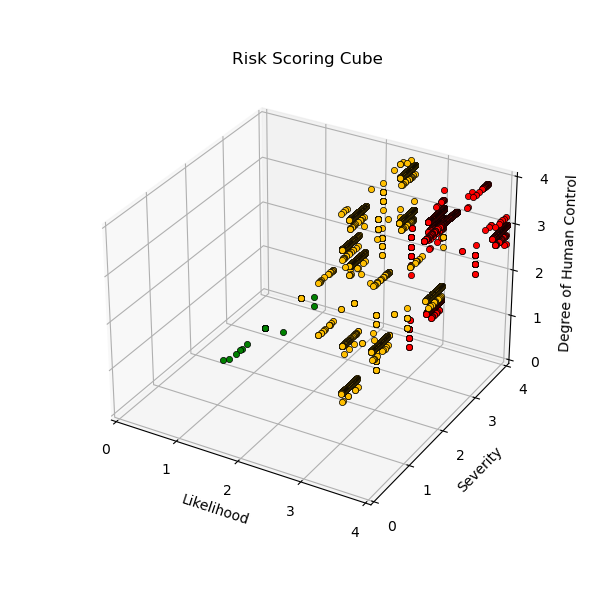

In [63]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])

plt.show()

<IPython.core.display.Javascript object>


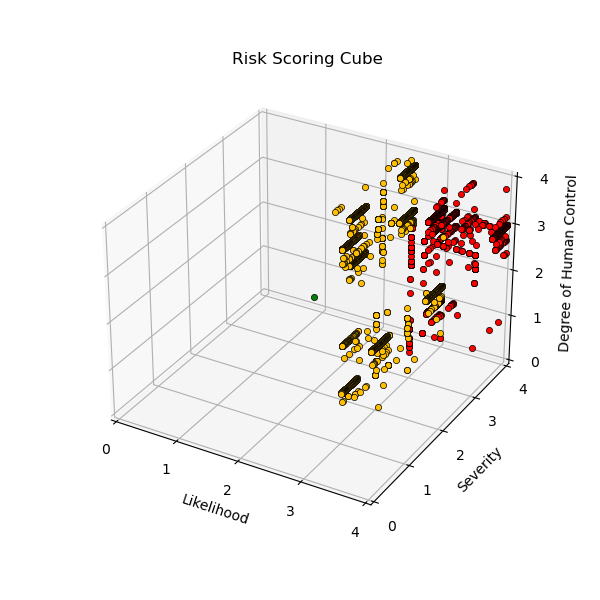

In [71]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])

plt.show()

# Reference Codes (Not Important)

<IPython.core.display.Javascript object>


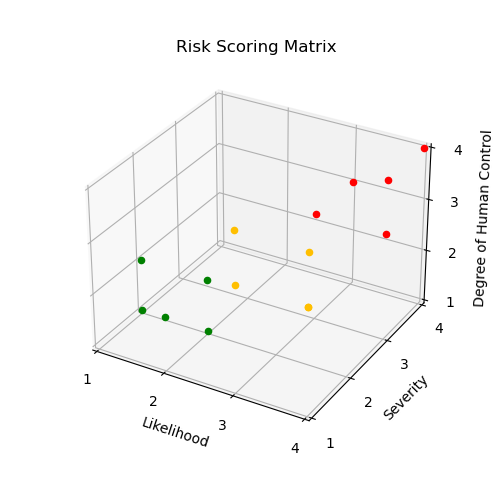

In [23]:
# Creating the empty figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Naming the figure & the axes 
ax.set_title("Risk Scoring Matrix")
ax.set_xlabel("Likelihood")
ax.set_ylabel("Severity")
ax.set_zlabel("Degree of Human Control")

# Setting the limits of each axes
ax.set_xlim(1,4)
ax.set_ylim(1,4)
ax.set_zlim(1,4)

# Setting the gridlines
ax.set_xticks([1,2,3,4])
ax.set_yticks([1,2,3,4])
ax.set_zticks([1,2,3,4])

# Plotting the points on the figure
# GREEN - Not likely, non severe, low deg 
ax.scatter(1,2,1, c='g')
ax.scatter(2,2,2, c='g') 
ax.scatter(2,1,2, c='g') 
ax.scatter(1,2,2, c='g') 
ax.scatter(2,2,1, c='g')
# AMBER - Likely, non severe, high deg
ax.scatter(4,1,4, c='#FFBF00') 
ax.scatter(3,1,4, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(3,1,3, c='#FFBF00') 
# RED - Likely, severe, high deg
ax.scatter(4,3,3, c='r') 
ax.scatter(3,4,3, c='r') 
ax.scatter(3,3,3, c='r') 
ax.scatter(4,3,4, c='r') 
ax.scatter(4,4,4, c='r')

plt.show()

<IPython.core.display.Javascript object>


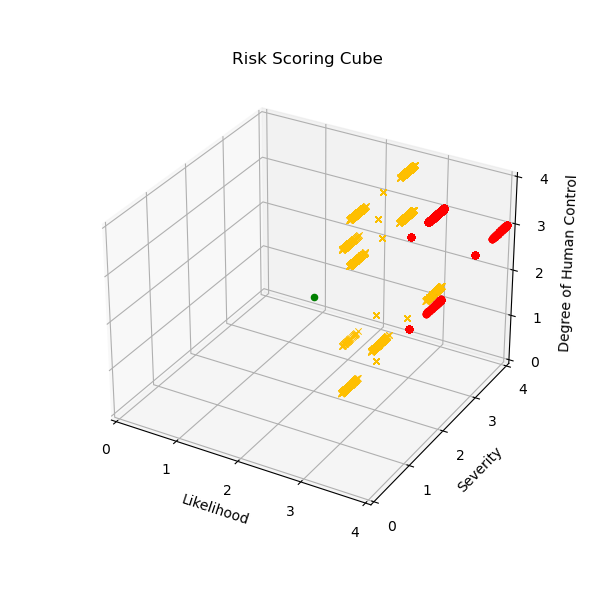

In [73]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'x', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'x', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])

plt.show()

<IPython.core.display.Javascript object>


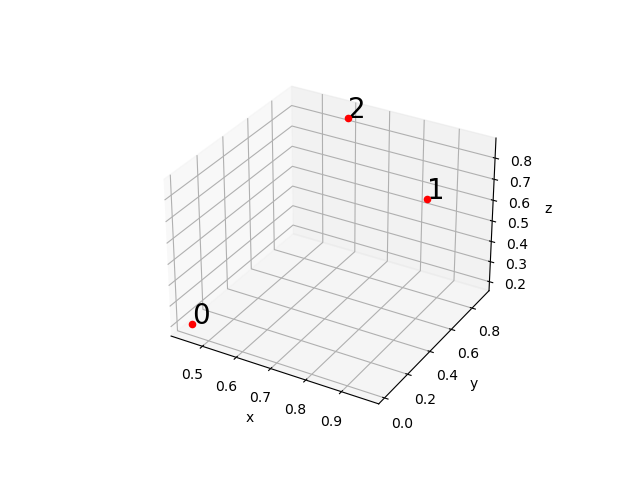

In [34]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

 
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets
 
fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(m)): #plot each point + it's index as text above
    ax.scatter(m[i,0],m[i,1],m[i,2],color='r') 
    ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
    color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()